## Project: HR Attrition Data
In this project , we need to predict whether a given employee will leave the
organization or not. Our target column is Attrition. We will create a model, perform EDA and predict the target column using ML concepts.

Made by: Monil R. Prajapati

### Importing packages

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn import metrics 

### Reading CSV file

In [2]:
dataset = pd.read_csv(r"C:\Users\monil\Downloads\ML content\codes\codes\HR_Employee_Attrition-1.csv")
dataset.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

In [3]:
dataset.shape

(2940, 35)

In [4]:
dataset.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
def initial_eda(dataset):
  if isinstance(dataset, pd.DataFrame):
    total_na = dataset.isna().sum().sum()
    print("Total Records", dataset.shape)
    print("Total NA Records", total_na)
    cols = dataset.columns
    dtype = dataset.dtypes
    duniq = dataset.nunique()
    na_val = dataset.isna().sum()
    print("Cols dataset", "Datatype", "unique_records", "null records")
    for i in range(len(dataset.columns)):
      print("%38s %10s %10s %10s"% (cols[i], dtype[i], duniq[i], na_val[i]))
  else:
    print('error in the code ')

In [6]:
initial_eda(dataset)

Total Records (2940, 35)
Total NA Records 0
Cols dataset Datatype unique_records null records
                        EmployeeNumber      int64       2940          0
                             Attrition     object          2          0
                                   Age      int64         43          0
                        BusinessTravel     object          3          0
                             DailyRate      int64        886          0
                            Department     object          3          0
                      DistanceFromHome      int64         29          0
                             Education      int64          5          0
                        EducationField     object          6          0
                         EmployeeCount      int64          1          0
               EnvironmentSatisfaction      int64          4          0
                                Gender     object          2          0
                            HourlyRate    

In [7]:
dataset.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
dataset.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

### Finding categorical fields

In [9]:
categorical  =[ var for var in dataset.columns if dataset[var].dtype == 'O']
print(categorical)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [10]:
categorical.__len__()

9

In [11]:
dataset[categorical].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [12]:
for i in categorical:
  print(dataset[i].value_counts())

No     2466
Yes     474
Name: Attrition, dtype: int64
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
Male      1764
Female    1176
Name: Gender, dtype: int64
Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64
Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64
Y    2940
Name: Over18, dtype: int64
No     2108
Yes     

### Correlation between different fields

In [13]:
correlation= dataset.corr()

<AxesSubplot:>

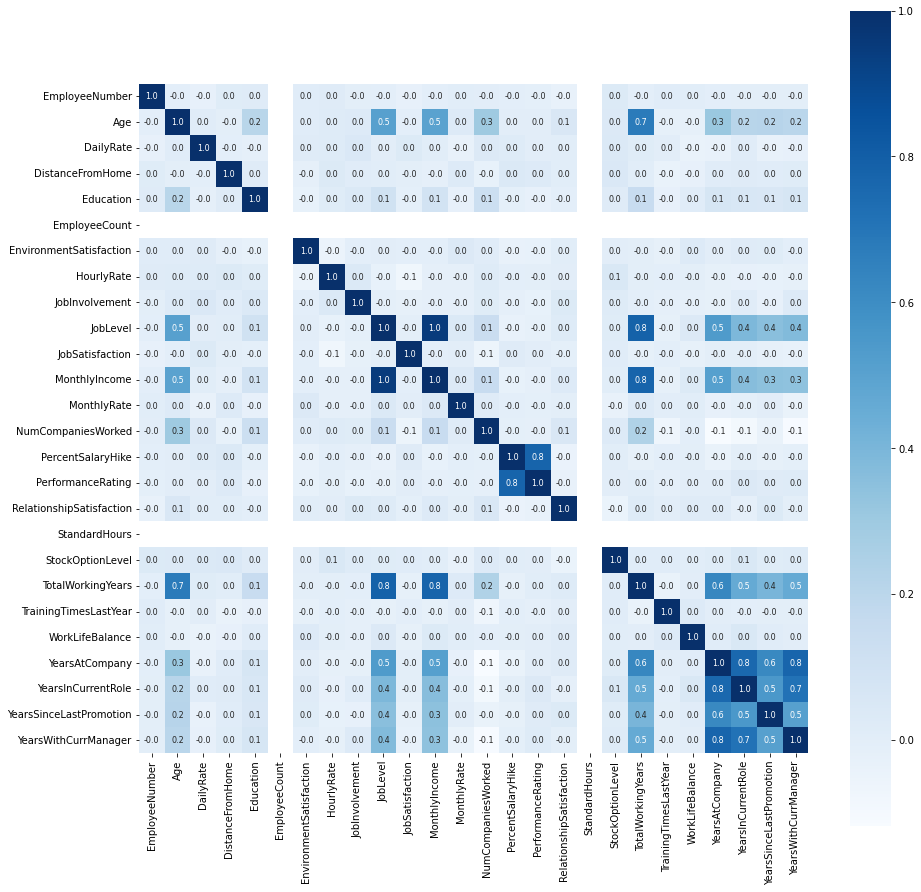

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

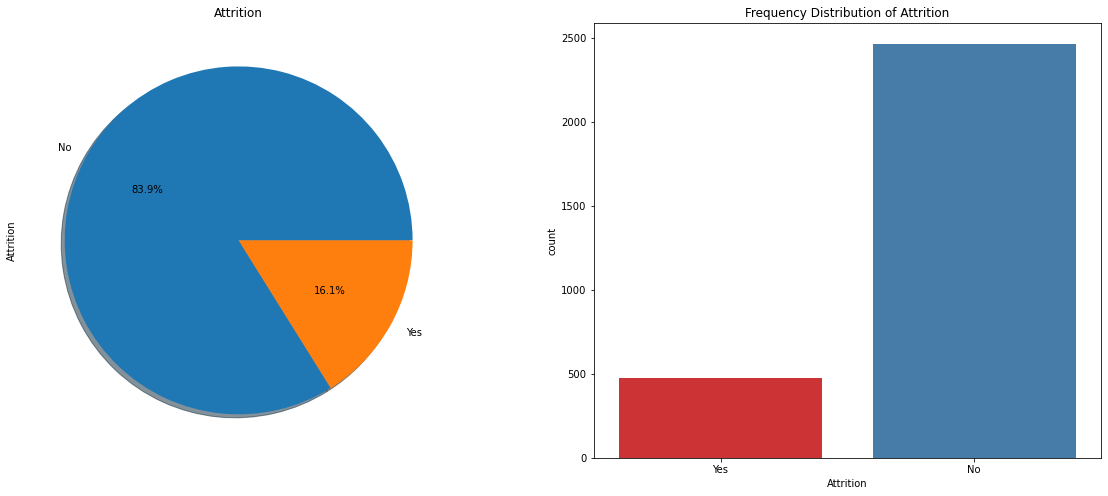

In [15]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0] = dataset['Attrition'].value_counts(). plot.pie(explode=[0,0], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Attrition')

ax[1] = sns.countplot(x='Attrition', data=dataset, palette='Set1')
ax[1].set_title("Frequency Distribution of Attrition")
plt.show()

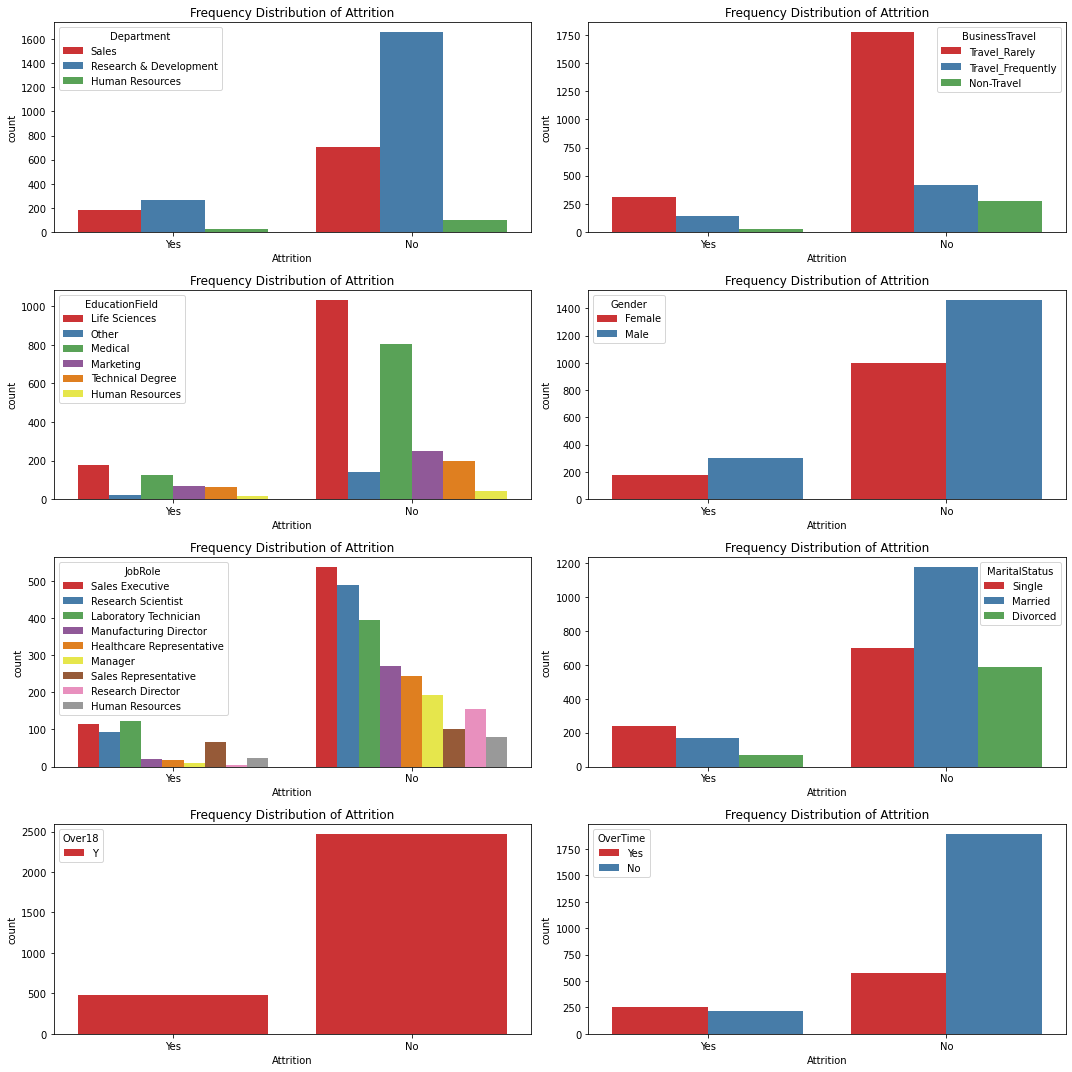

In [16]:
f, ax = plt.subplots(4,2, figsize=(15,15))
ax[0,0] = sns.countplot(x='Attrition', hue='Department', ax= ax[0,0] , data=dataset, palette='Set1' )
ax[0,0].set_title("Frequency Distribution of Attrition")


ax[0,1] = sns.countplot(x='Attrition', hue= 'BusinessTravel',ax=ax[0,1], data=dataset, palette='Set1' )
ax[0,1].set_title("Frequency Distribution of Attrition")

ax[1,0] = sns.countplot(x='Attrition', hue= 'EducationField',ax=ax[1,0], data=dataset, palette='Set1' )
ax[1,0].set_title("Frequency Distribution of Attrition")

ax[1,1] = sns.countplot(x='Attrition', hue= 'Gender',ax=ax[1,1], data=dataset, palette='Set1' )
ax[1,1].set_title("Frequency Distribution of Attrition")

ax[2,0] = sns.countplot(x='Attrition', hue= 'JobRole',ax=ax[2,0], data=dataset, palette='Set1' )
ax[2,0].set_title("Frequency Distribution of Attrition")

ax[2,1] = sns.countplot(x='Attrition', hue= 'MaritalStatus',ax=ax[2,1], data=dataset, palette='Set1' )
ax[2,1].set_title("Frequency Distribution of Attrition")

ax[3,0] = sns.countplot(x='Attrition', hue= 'Over18',ax=ax[3,0], data=dataset, palette='Set1' )
ax[3,0].set_title("Frequency Distribution of Attrition")

ax[3,1] = sns.countplot(x='Attrition', hue= 'OverTime',ax=ax[3,1], data=dataset, palette='Set1' )
ax[3,1].set_title("Frequency Distribution of Attrition")
f.tight_layout()

In [17]:
dataset.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Dropping unnecessary columns

In [18]:
x = dataset.drop(columns=['EmployeeNumber','Attrition','Over18','StandardHours','EmployeeCount'], axis=1)
y = dataset['Attrition']

In [19]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [20]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

### Training and testing of model

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2352, 30) (588, 30) (2352,) (588,)


### Converting categorical values into numerical values

In [23]:
encoder = ce.OrdinalEncoder(cols=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [24]:
print(X_train[0:5])

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
456    31               1        688           1                 7          3   
462    34               1        258           1                21          4   
2174   35               1        882           1                 3          4   
2669   36               1       1351           2                26          4   
381    30               1        202           1                 2          1   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
456                1                        3       1          44  ...   
462                1                        4       1          74  ...   
2174               1                        4       1          92  ...   
2669               1                        1       1          80  ...   
381                2                        3       1          72  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel 

### Data processing and applying random forest algorithm

In [25]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns= [cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, y_pred)
print('Accuracy of the model:', np.abs(score)*100)

Accuracy of the model: 95.23809523809523


#### Made by: Monil R. Prajapati